In [ ]:
# AI: PriceOptima – Dynamic Pricing System
## Milestone 3: Exploratory Data Analysis (EDA)

### Objective:
To analyze pricing behavior, demand patterns, inventory trends, and revenue insights to support dynamic pricing decisions.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [6]:
df = pd.read_csv("../data/processed/sales_cleaned.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Competitor Pricing,Seasonality,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,85.73,Winter,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,92.02,Winter,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,60.08,Winter,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,85.19,Winter,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,51.63,Winter,59


In [10]:
df.info()



<class 'pandas.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  str    
 1   Store ID            76000 non-null  str    
 2   Product ID          76000 non-null  str    
 3   Category            76000 non-null  str    
 4   Region              76000 non-null  str    
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  str    
 11  Competitor Pricing  76000 non-null  float64
 12  Seasonality         76000 non-null  str    
 13  Demand              76000 non-null  int64  
dtypes: float64(2), int64(5), str(7)
memory usage: 8.1 MB


In [11]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Competitor Pricing,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,69.454029,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,40.943818,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,4.290000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,32.620000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,65.700000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,97.932500,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,261.220000,430.000000


In [12]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Competitor Pricing    0
Seasonality           0
Demand                0
dtype: int64

In [ ]:
#The dataset contains product pricing, sales, and inventory information collected over time. It includes variables such as price, quantity sold, inventory levels, and revenue.

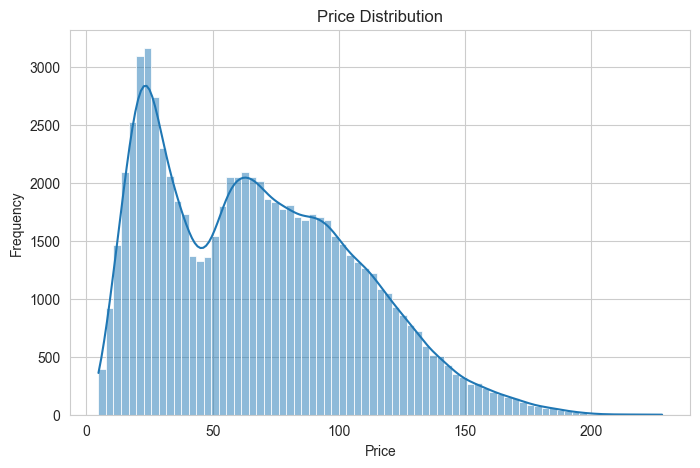

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

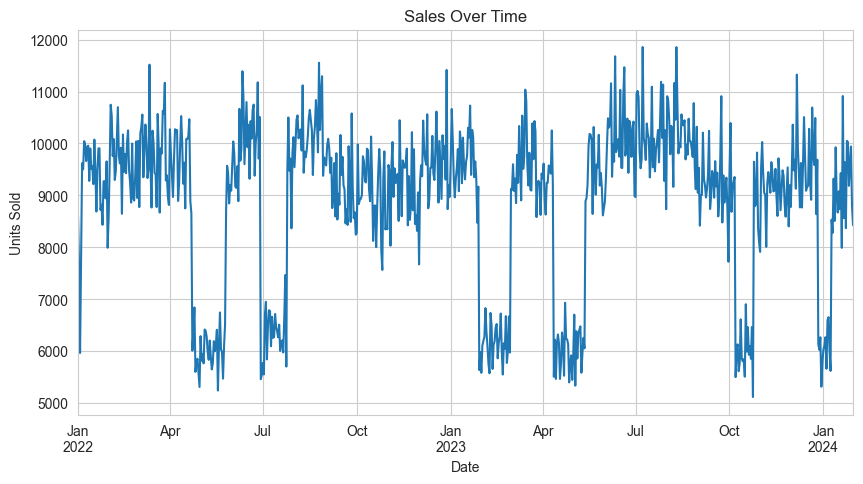

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

daily_sales = df.groupby('Date')['Units Sold'].sum()

plt.figure(figsize=(10,5))
daily_sales.plot()
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

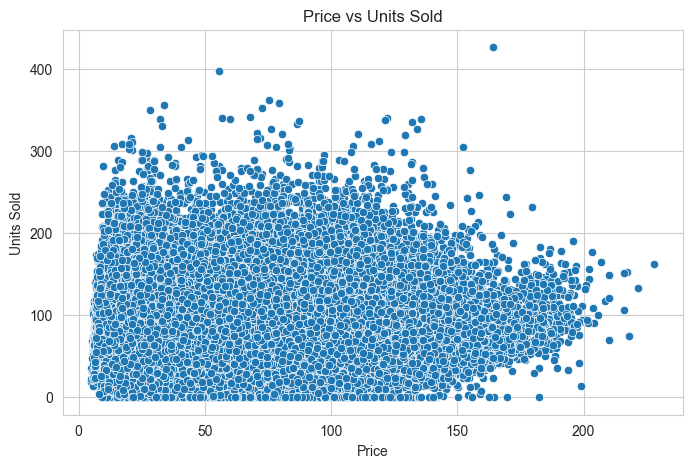

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Units Sold', data=df)
plt.title("Price vs Units Sold")
plt.show()

In [25]:
df['Revenue'] = df['Price'] * df['Units Sold']

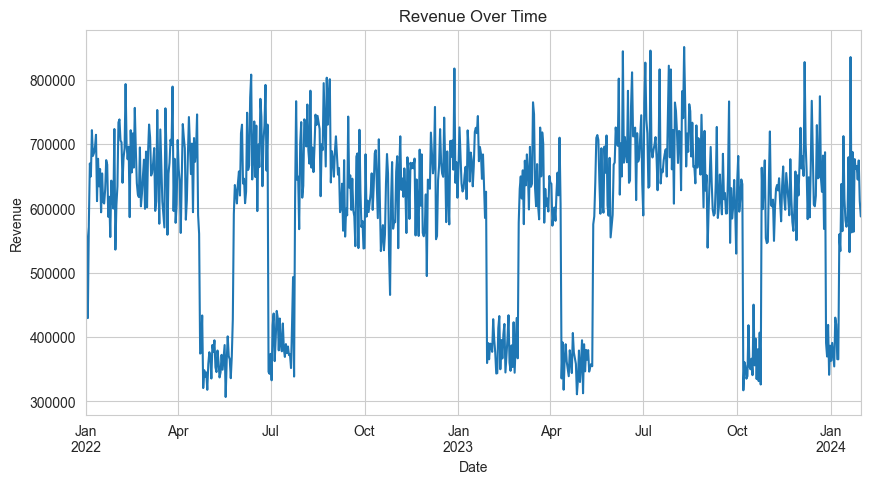

In [26]:
daily_revenue = df.groupby('Date')['Revenue'].sum()

plt.figure(figsize=(10,5))
daily_revenue.plot()
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

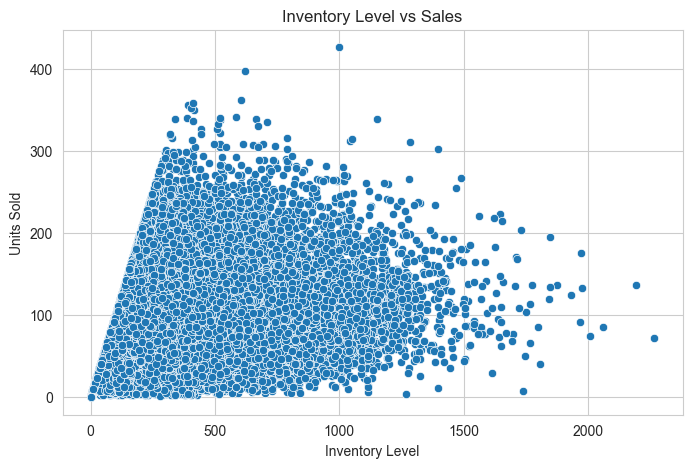

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Inventory Level', y='Units Sold', data=df)
plt.title("Inventory Level vs Sales")
plt.show()

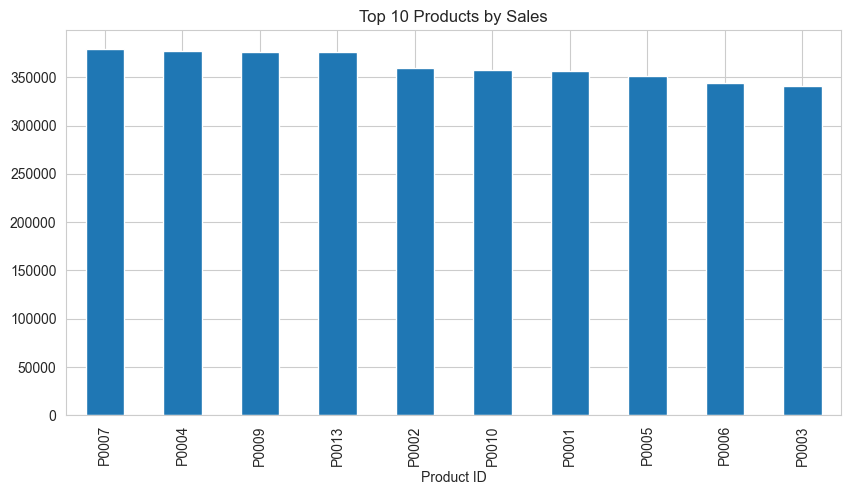

In [29]:
product_sales = df.groupby('Product ID')['Units Sold'].sum()

product_sales.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Products by Sales")
plt.show()

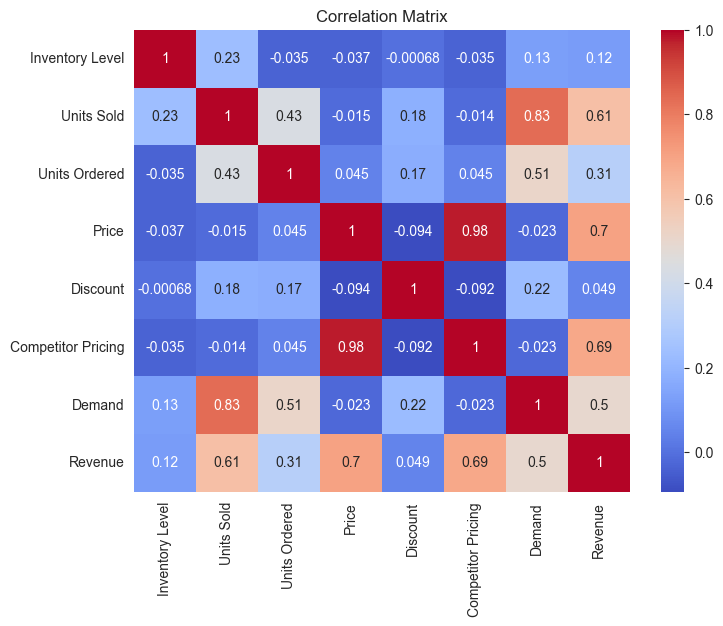

In [31]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
## Conclusion

#The exploratory data analysis reveals important demand patterns, pricing sensitivity, and revenue drivers. These insights will serve as the foundation for feature engineering and dynamic pricing model development in the next milestone.